In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/ShamshudeenJ/AnalyticsClass/master/roomSensorData.csv"
df = pd.read_csv(url)

print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  1000 non-null   float64
 1   Humidity     1000 non-null   float64
 2   CO2          1000 non-null   float64
 3   Occupancy    1000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
None
       Temperature     Humidity          CO2    Occupancy
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     21.432120    25.312760   716.005630     0.350000
std       1.037998     2.412848   291.629558     0.477208
min      20.200000    22.100000   427.500000     0.000000
25%      20.627500    23.075000   464.575000     0.000000
50%      20.900000    24.970000   581.175000     0.000000
75%      22.335000    26.962500   984.250000     1.000000
max      24.410000    31.470000  1402.250000     1.000000
   Temperature  Humidity     CO2  Occupancy
0        21.53     28

0    650
1    350
Name: Occupancy, dtype: int64


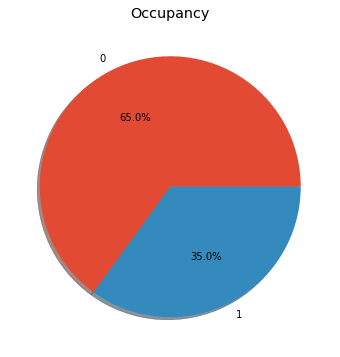

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(18,6))
x = df['Occupancy'].value_counts()
print(x)
plt.pie(x,labels=[0,1],shadow=True,autopct='%1.1f%%')
plt.title('Occupancy')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

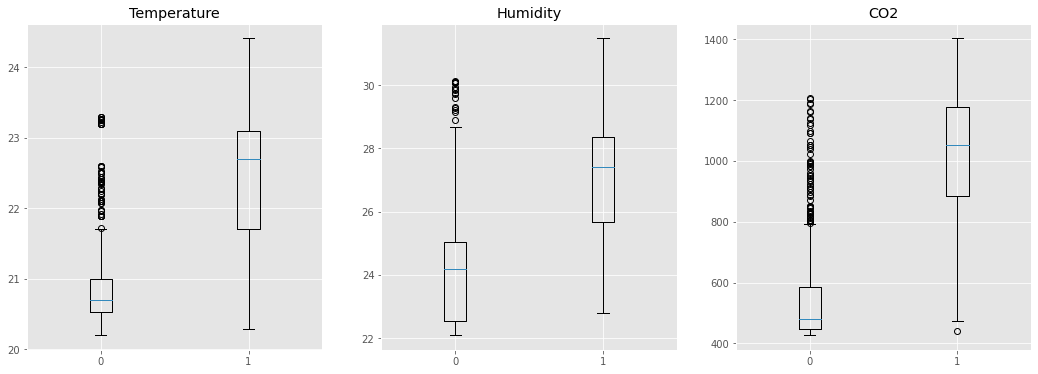

In [4]:
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(1,3,1)
x = []
for i in df.Occupancy.unique():
   x.append(df[df['Occupancy'] == i]['Temperature'])
ax1.boxplot(x)
ax1.set_xticklabels([0,1])
ax1.set_title('Temperature')

ax2 = fig.add_subplot(1,3,2)
x = []
for i in df.Occupancy.unique():
   x.append(df[df['Occupancy'] == i]['Humidity'])
ax2.boxplot(x)
ax2.set_xticklabels([0,1])
ax2.set_title('Humidity')

ax3 = fig.add_subplot(1,3,3)
x = []
for i in df.Occupancy.unique():
   x.append(df[df['Occupancy'] == i]['CO2'])
ax3.boxplot(x)
ax3.set_xticklabels([0,1])
ax3.set_title('CO2')

plt.show()

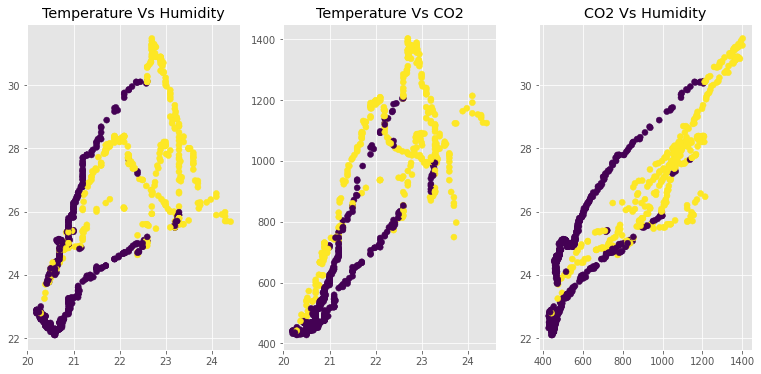

In [5]:
fig = plt.figure(figsize=(13,6))
x=df['Temperature']
y=df['Humidity']
z=df['CO2']
ax1 = fig.add_subplot(131)
ax1.scatter(x,y,c=df['Occupancy']*5)
ax1.set_title('Temperature Vs Humidity')

ax2 = fig.add_subplot(132)
ax2.scatter(x,z,c=df['Occupancy']*5)
ax2.set_title('Temperature Vs CO2')

ax3 = fig.add_subplot(133)
ax3.scatter(z,y,c=df['Occupancy']*5)
ax3.set_title('CO2 Vs Humidity')

plt.show()

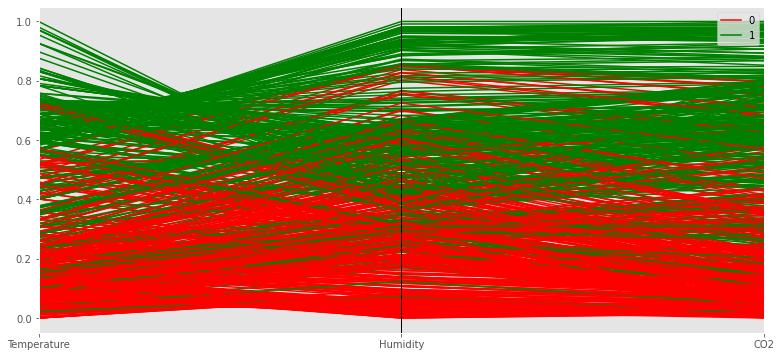

In [ ]:
from pandas.plotting import parallel_coordinates
result = df.copy()
dfPlot = df.drop('Occupancy',axis=1)
fig = plt.figure(figsize=(13,6))

for feature_name in dfPlot.columns:
   max_value = dfPlot[feature_name].max()
   min_value = dfPlot[feature_name].min()
   result[feature_name] = (dfPlot[feature_name] - min_value) / (max_value - min_value)
parallel_coordinates(result,'Occupancy',color=('r','g'))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

Xml=df.drop(['Occupancy'],axis=1)
X=Xml.values
Y = df['Occupancy'].values

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

print('Train: ',X_train.shape, y_train.shape)
print('Test: ',X_test.shape, y_test.shape) 

Train:  (750, 3) (750,)
Test:  (250, 3) (250,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

MLmodel = DecisionTreeClassifier(max_depth = 3)
MLmodel.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.model_selection import cross_val_score

print(MLmodel.score(X_test,y_test)) 

CVscores = cross_val_score(MLmodel,X,Y,cv=5)
print(CVscores) 

0.884
[0.9   0.91  0.885 0.925 0.895]


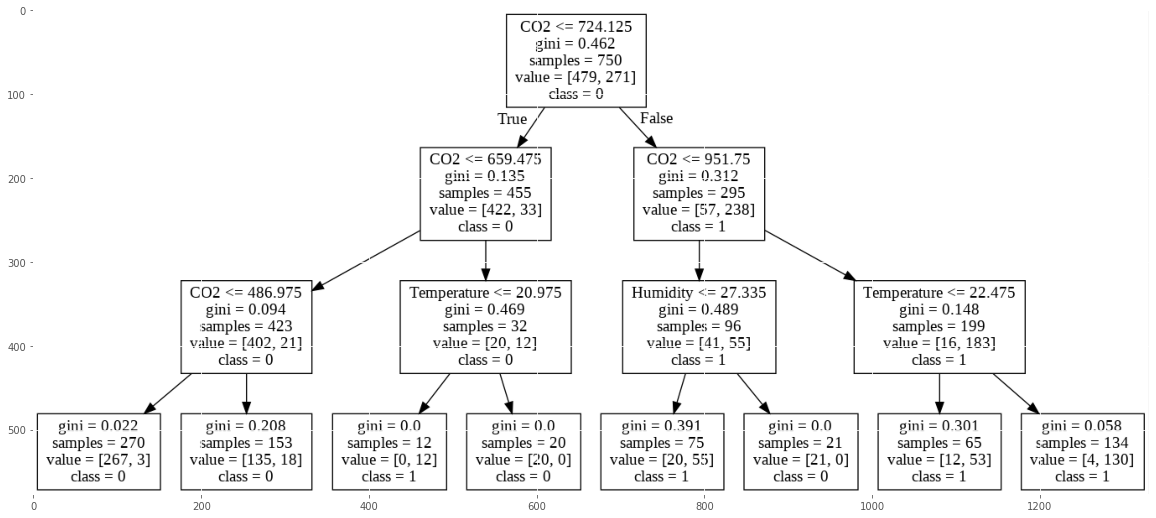

In [ ]:
from sklearn.tree import export_graphviz
import os
import matplotlib.image as mpimg

dotfile = open("myModel.dot", 'w')
export_graphviz(MLmodel,out_file=dotfile,
	feature_names=Xml.columns,class_names=['0','1'])
dotfile.close()
os.system('dot myModel.dot -Tpng -o myModel.png')
img=mpimg.imread('myModel.png')
fig = plt.figure(figsize=(20,10))
imgplot = plt.imshow(img)
plt.show()